In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler, RobustScaler
import seaborn as sns

In [13]:
# loading and previewing the dataset
data = pd.read_csv('water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [14]:
""" 
data cleaning and applying the Min-Max normalization to transform the data so that each feature is scaled
to a range between 0 and 1 without distorting differences in the ranges of values. 
"""
data_cleaned = data.dropna()
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_cleaned)
data_normalized_df = pd.DataFrame(data_normalized, columns=data_cleaned.columns)
print(data_normalized_df.head())

         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.587349  0.577747  0.386298     0.568199  0.647347      0.292985   
1  0.643654  0.441300  0.314381     0.439304  0.514545      0.356685   
2  0.388934  0.470876  0.506122     0.524364  0.561537      0.142913   
3  0.725820  0.715942  0.506141     0.521683  0.751819      0.148683   
4  0.610517  0.532588  0.237701     0.270288  0.495155      0.494792   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.654522         0.795029   0.630115         0.0  
1        0.377248         0.202914   0.520358         0.0  
2        0.249922         0.401487   0.219973         0.0  
3        0.467200         0.658678   0.242428         0.0  
4        0.409721         0.469762   0.585049         0.0  


In [15]:
#computing the basic statistics
mean_values = data_cleaned.mean()
median_values = data_cleaned.median()
std_dev_values = data_cleaned.std()
skewness_values = data_cleaned.skew()
kurtosis_values = data_cleaned.kurt()

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Standard Deviation:\n", std_dev_values)
print("Skewness:\n", skewness_values)
print("Kurtosis:\n", kurtosis_values)

Mean Values:
 ph                     7.085990
Hardness             195.968072
Solids             21917.441374
Chloramines            7.134338
Sulfate              333.224672
Conductivity         426.526409
Organic_carbon        14.357709
Trihalomethanes       66.400859
Turbidity              3.969729
Potability             0.403282
dtype: float64
Median Values:
 ph                     7.027297
Hardness             197.191839
Solids             20933.512750
Chloramines            7.143907
Sulfate              332.232177
Conductivity         423.455906
Organic_carbon        14.322019
Trihalomethanes       66.542198
Turbidity              3.968177
Potability             0.000000
dtype: float64
Standard Deviation:
 ph                    1.573337
Hardness             32.635085
Solids             8642.239815
Chloramines           1.584820
Sulfate              41.205172
Conductivity         80.712572
Organic_carbon        3.324959
Trihalomethanes      16.077109
Turbidity             0.780346


In [29]:
#clustering with KMeans
xy = data[['Sulfate', 'Hardness']].dropna().values
scaler = MinMaxScaler()
xy_normalized = scaler.fit_transform(xy)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(xy_normalized)

#calculating and printing the silhouette score
silhouette_avg = silhouette_score(xy_normalized, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3078893501912021


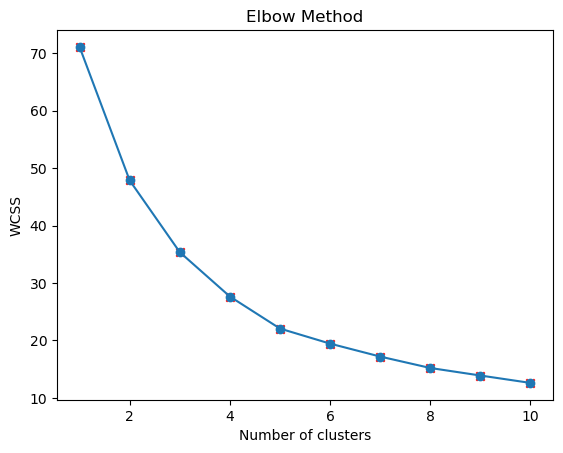

In [30]:
#plotting the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans.fit(xy_normalized)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, '-o') 
plt.scatter(range(1, 11), wcss, marker='x', color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [17]:
#calculating and printing the descriptive statistics and correlation matrix for the cleaned data

correlation_matrix = data_cleaned.corr()

print("Correlation Matrix:\n", correlation_matrix)
print("Descriptive Statistics:\n", data_cleaned.describe())

Correlation Matrix:
                        ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.108948 -0.087615    -0.024768  0.010524   
Hardness         0.108948  1.000000 -0.053269    -0.022685 -0.108521   
Solids          -0.087615 -0.053269  1.000000    -0.051789 -0.162769   
Chloramines     -0.024768 -0.022685 -0.051789     1.000000  0.006254   
Sulfate          0.010524 -0.108521 -0.162769     0.006254  1.000000   
Conductivity     0.014128  0.011731 -0.005198    -0.028277 -0.016192   
Organic_carbon   0.028375  0.013224 -0.005484    -0.023808  0.026776   
Trihalomethanes  0.018278 -0.015400 -0.015668     0.014990 -0.023347   
Turbidity       -0.035849 -0.034831  0.019409     0.013137 -0.009934   
Potability       0.014530 -0.001505  0.040674     0.020784 -0.015303   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.014128        0.028375         0.018278  -0.035849   
Hardness             0.011731   

In [49]:
def scatter(data):
    """
    Creates a scatter plot to visualize the relationship between Chloramines and Trihalomethanes in the dataset, including a line of best fit.
    
    Args:
    data (DataFrame): The DataFrame containing the columns 'Chloramines' and 'Trihalomethanes' used for plotting.

    """

    plt.figure(figsize=(10, 6))
    sns.regplot(x='Chloramines', y='Trihalomethanes', data=data, scatter_kws={'alpha':0.5})
    plt.title('Relationship between Chloramines and Trihalomethanes with Line of Best Fit')
    plt.xlabel('Chloramines')
    plt.ylabel('Trihalomethanes')

    plt.show()

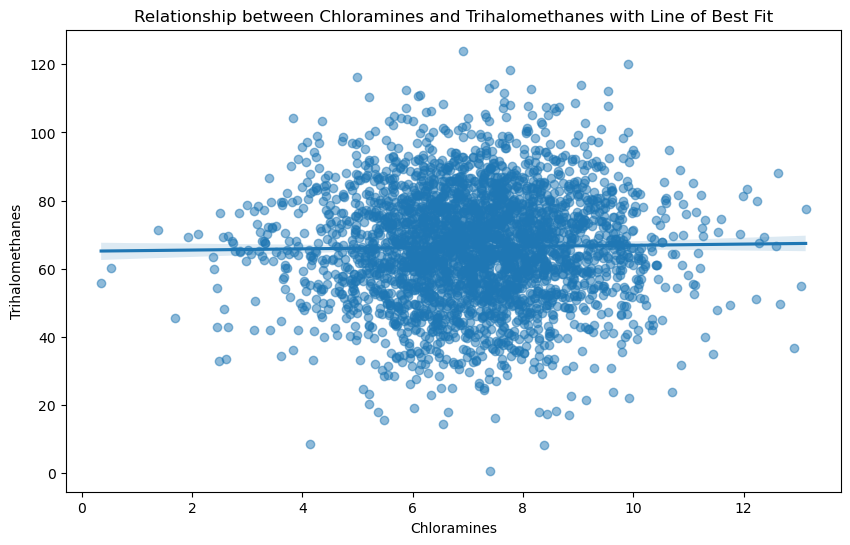

In [50]:
scatter(data)

In [19]:
#clustering with KMeans
xy = data[['Sulfate', 'Hardness']].dropna().values
scaler = MinMaxScaler()
xy_normalized = scaler.fit_transform(xy)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(xy_normalized)

#calculating and printing the silhouette score
silhouette_avg = silhouette_score(xy_normalized, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3078893501912021


C:\Users\orons\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


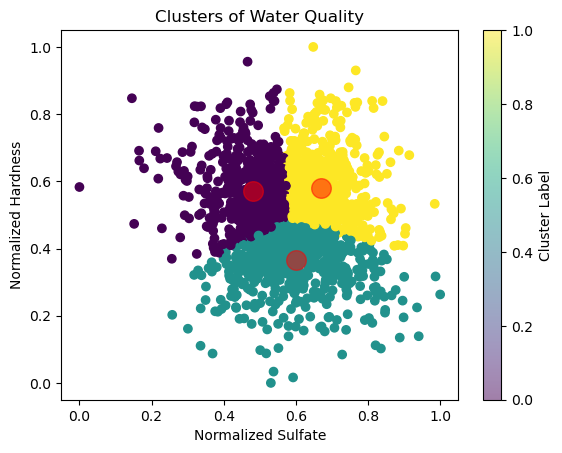

In [20]:
xy = data_cleaned[['Sulfate', 'Hardness']].values
scaler = MinMaxScaler()
xy_normalized = scaler.fit_transform(xy)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(xy_normalized)

#cluster centers
centers = kmeans.cluster_centers_

#predicting the cluster for each data point
labels = kmeans.labels_

#plotting the clusters and their centers
plt.scatter(xy_normalized[:, 0], xy_normalized[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='o') 
plt.title('Clusters of Water Quality')
plt.xlabel('Normalized Sulfate')
plt.ylabel('Normalized Hardness')
plt.colorbar(label='Cluster Label')

plt.show()

In [51]:
def barplot(data):
    """
    Plots a bar chart representing the count of potable versus non-potable water samples to visualize the distribution of water potability in the dataset.
    
    Args:
    data (DataFrame): The DataFrame containing the 'Potability' column with binary values indicating water potability.

    """

    #plotting a bar chart
    potability_counts = data['Potability'].value_counts()

    sns.barplot(x=potability_counts.index, y=potability_counts.values)
    plt.title('Count of Potable vs. Non-Potable Water Samples')
    plt.xlabel('Potability (0: Non-Potable, 1: Potable)')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Non-Potable', 'Potable'])  

    plt.show()

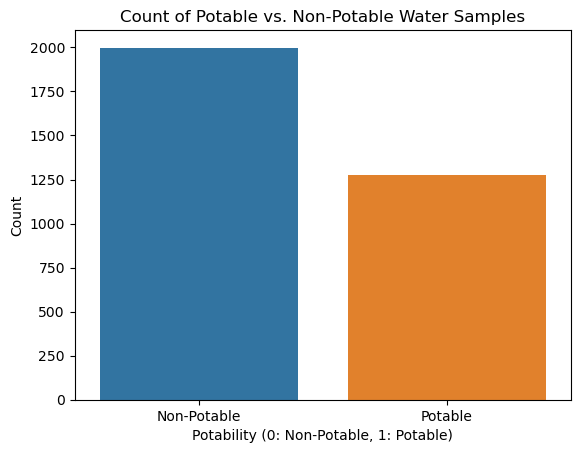

In [52]:
barplot(data)


In [53]:
def histogram (data):
    """
    plots a histogram to show the distribution of water hardness measurements, with a kernel density estimate to visualize the shape of the distribution.
    
    arg:
    data(dataframe):The dataFrame containing the 'hardness' column with water hardness measurements

    """

    #plotting the distribution of Hardness
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Hardness'], kde=True, color='purple', binwidth=10)
    plt.title('Distribution of Water Hardness')
    plt.xlabel('Hardness (mg/L of CaCO3)')
    plt.ylabel('Frequency')

    plt.show()

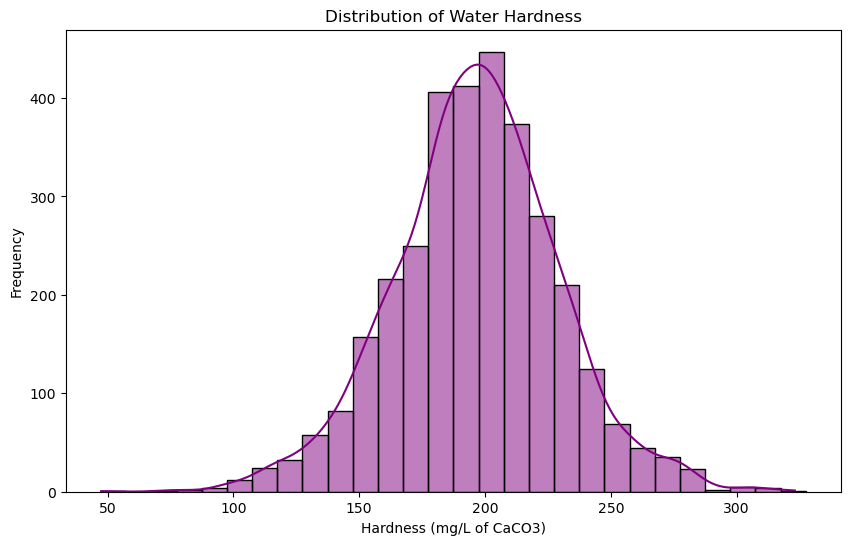

In [54]:
histogram (data)


In [55]:
def heatmap (data):
    """
    Creates a heatmap to visualize the correlation matrix of the dataset.
    
    Args:
    data (DataFrame): The DataFrame from which the correlation matrix is calculated.

    """

    #creating a heatmap to visualize the correlation matrix
    correlation_matrix = data.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
    plt.title('Heatmap of Correlation Matrix')

    plt.show()

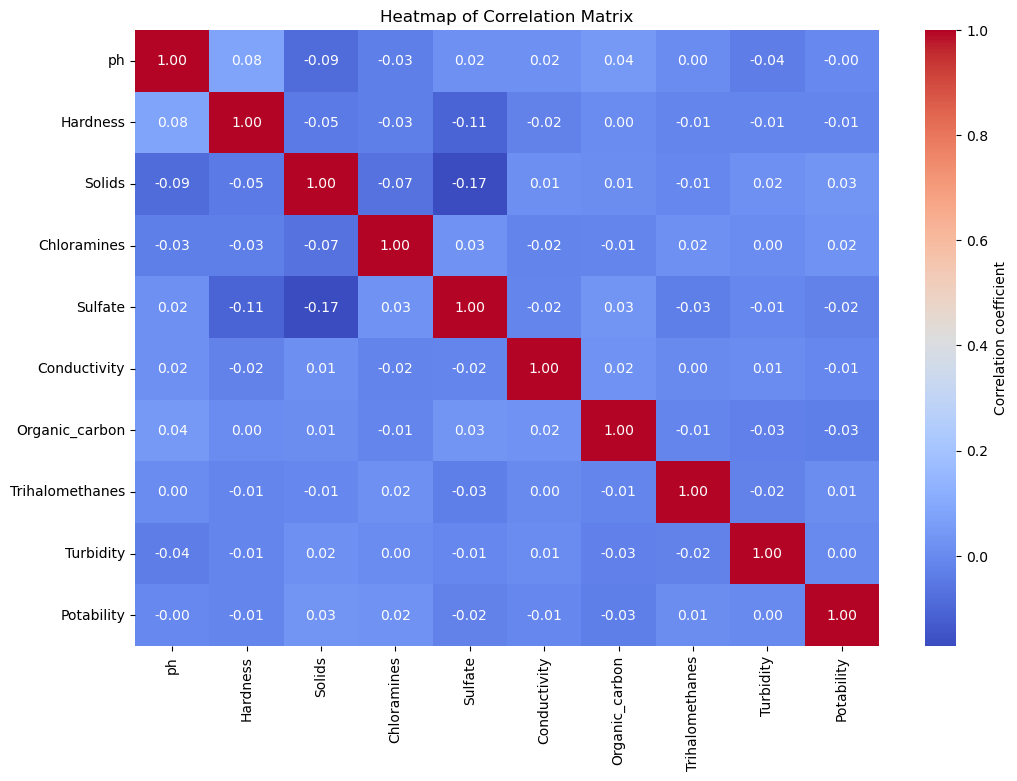

In [56]:
heatmap (data)